# import packages

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import scipy.stats as stats

# load dataset

Read the CSV data into a DataFrame, define -1 values as None

In [ ]:
path = "../data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv"
df = pd.read_csv(path, na_values=-1)

# data exploration

In [ ]:
# Shape of the dataset
shape = df.shape

# Data types of the columns
data_types = df.dtypes

# Check for missing values
missing_values = df.isnull().sum()

# Descriptive statistics of the numerical columns
descriptive_stats = df.describe()

# Count of unique values for each column
unique_counts = df.nunique()

shape, data_types, missing_values, descriptive_stats, unique_counts

Check for outliers or inconsistencies For numerical columns and boxplot

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_xlabel(column, rotation=90, labelpad=10)  # Rotate x-axis labels by 90 degrees and place them above
    axes[i].tick_params(axis='x', bottom=False)  # Hide x-axis ticks

plt.tight_layout()
plt.show()


Check for outliers or inconsistencies For categorical columns

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    # Check unique values
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())

Calculate the range of diversity for each numerical column

In [ ]:
diversity_ranges = {}
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numerical
        column_range = df[column].max() - df[column].min()
        diversity_ranges[column] = column_range + 1

# Print the range of diversity for each numerical column
for column, diversity_range in diversity_ranges.items():
    print(f"Range of diversity for '{column}': {diversity_range}")

# Descriptive Statistics

Summary statistics for numerical variables

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = df[numerical_columns].describe()
print("Summary statistics for numerical variables:")
print(numerical_summary)

Frequency tables for categorical variables

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nFrequency table for {column}:")
    print(df[column].value_counts())

# Data preprocessing

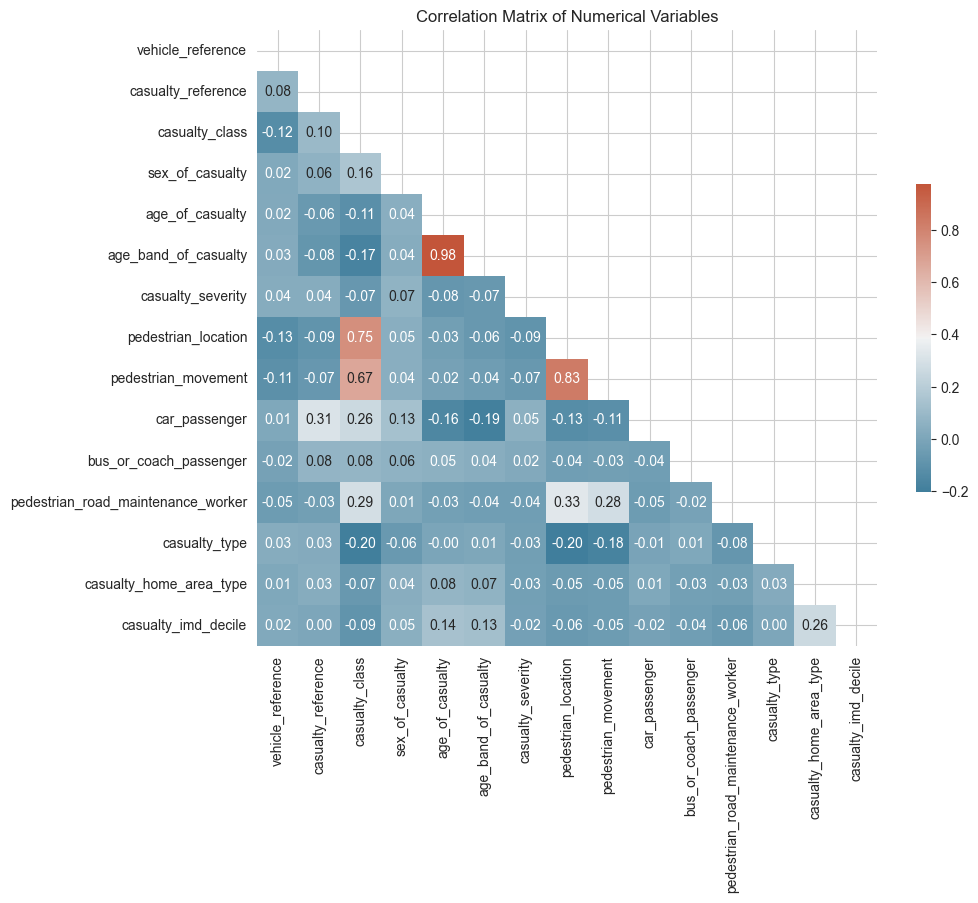

In [144]:
df_numeric = df.select_dtypes(exclude=['object'])
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap=cmap, cbar_kws={"shrink": .5}, fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Data Cleaning

In [ ]:
df.drop(columns=['accident_year', 'accident_reference', 'status'], inplace=True)
df.drop_duplicates(inplace=True)

Handle missing data

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with mode
imputer_mode = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the data
df['sex_of_casualty'] = imputer_mode.fit_transform(df[['sex_of_casualty']])
df['casualty_type'] = imputer_mode.fit_transform(df[['casualty_type']])
df['car_passenger'] = imputer_mode.fit_transform(df[['car_passenger']])
df['bus_or_coach_passenger'] = imputer_mode.fit_transform(
    df[['bus_or_coach_passenger']])
df['pedestrian_road_maintenance_worker'] = imputer_mode.fit_transform(
    df[['pedestrian_road_maintenance_worker']])

# Impute missing values with median
imputer_median = SimpleImputer(strategy='median')

df['age_of_casualty'] = imputer_median.fit_transform(df[['age_of_casualty']])
df['age_band_of_casualty'] = imputer_median.fit_transform(
    df[['age_band_of_casualty']])
df.dropna(inplace=True)


remove outliers

In [152]:
df = df[(df['vehicle_reference'] != 227) & (df['vehicle_reference'] != 61)]
df = df[(df['casualty_reference'] != 22) & (df['casualty_reference'] != 148)]


# Data Type Conversion

In [ ]:
columns_to_convert = ['sex_of_casualty', 'age_of_casualty',
                      'age_band_of_casualty',
                      'car_passenger', 'bus_or_coach_passenger',
                      'pedestrian_road_maintenance_worker', 'casualty_type',
                      'casualty_home_area_type', 'casualty_imd_decile']

# Convert columns to int type
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Exploratory Data Analysis (EDA)

Plot the distribution of accident severities

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

current_palette = sns.color_palette() 

plt.figure(figsize=(10, 6))
sns.countplot(x='casualty_severity', data=df, palette=current_palette)

plt.title('Distribution of Accident Severities', fontsize=16)
plt.xlabel('Casualty Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Compare the distribution of casualty severity across different demographic groups

1. Gender vs. Casualty Severity

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2721931605.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='casualty_severity', hue='sex_of_casualty', data=df, palette=current_palette)


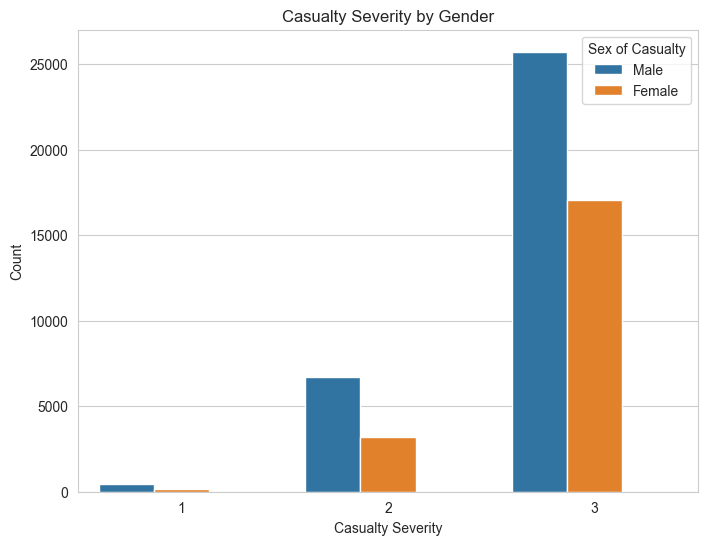

In [116]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='sex_of_casualty', data=df, palette=current_palette)
plt.title('Casualty Severity by Gender')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Sex of Casualty', labels=['Male', 'Female'])
plt.show()

2. Age Band vs. Casualty Severity

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\357334125.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='age_band_of_casualty', hue='casualty_severity', data=df, order=sorted(df['age_band_of_casualty'].unique()), palette=current_palette)


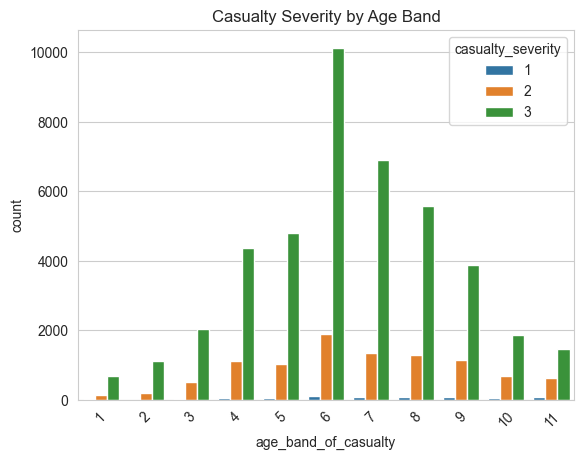

In [117]:
sns.countplot(x='age_band_of_casualty', hue='casualty_severity', data=df, order=sorted(df['age_band_of_casualty'].unique()), palette=current_palette)
plt.title('Casualty Severity by Age Band')
plt.xticks(rotation=45)
plt.show()

Plot the relationship between casualty severity and casualty class

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3525995236.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='casualty_severity', hue='casualty_class', data=df, palette=current_palette)


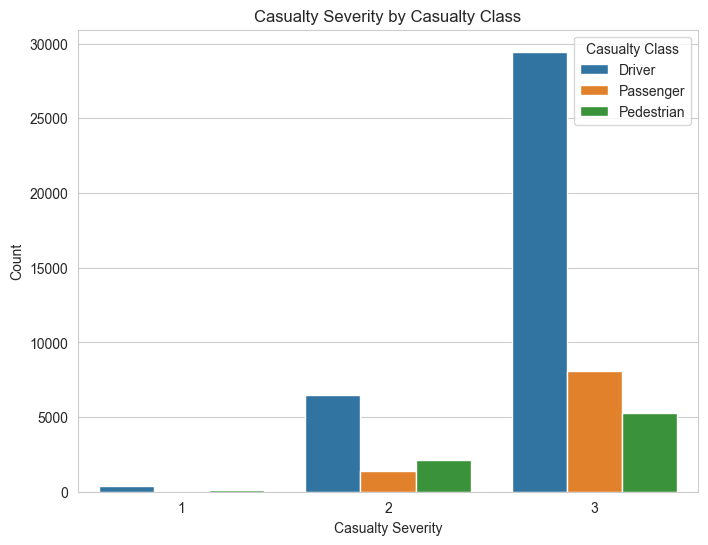

In [119]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_class', data=df, palette=current_palette)
plt.title('Casualty Severity by Casualty Class')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Casualty Class', labels=['Driver', 'Passenger', 'Pedestrian'])
plt.show()

Plot the relationship between casualty severity and casualty's home area type

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3505886570.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='casualty_severity', hue='casualty_home_area_type', data=df, palette=current_palette)


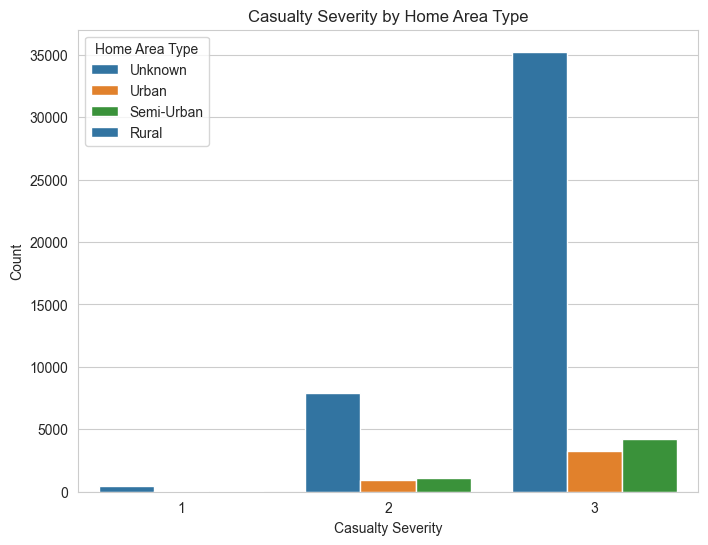

In [120]:
plt.figure(figsize=(8, 6))
sns.countplot(x='casualty_severity', hue='casualty_home_area_type', data=df, palette=current_palette)
plt.title('Casualty Severity by Home Area Type')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.legend(title='Home Area Type', labels=['Unknown', 'Urban', 'Semi-Urban', 'Rural'])
plt.show()

Plot the distribution of casualty types

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\81142127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='casualty_type', data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\81142127.py:2: UserWarning: 
The palette list has fewer values (10) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='casualty_type', data=df, palette=current_palette)


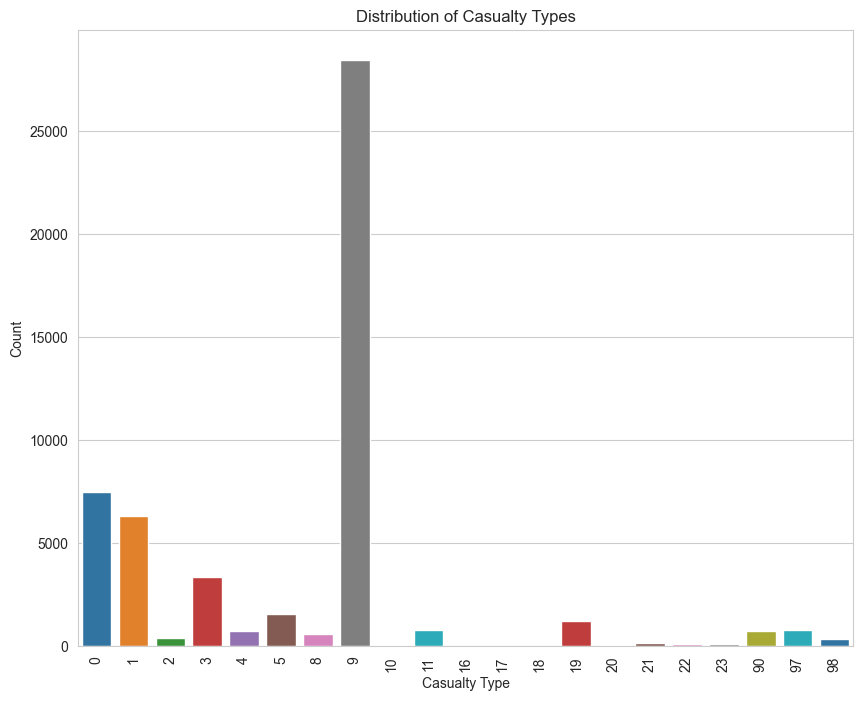

In [122]:
plt.figure(figsize=(10, 8))
sns.countplot(x='casualty_type', data=df, palette=current_palette)
plt.title('Distribution of Casualty Types')
plt.xlabel('Casualty Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Plot the distribution of pedestrian location values

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3357733115.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pedestrian_location', data=df, ax=axes[0], palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3357733115.py:29: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='pedestrian_location', data=df, ax=axes[0], palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3357733115.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(pedestrian_location_labels.values(), rotation=90)  # Add legend with rotated labels
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3357733115.py:35: FutureWarnin

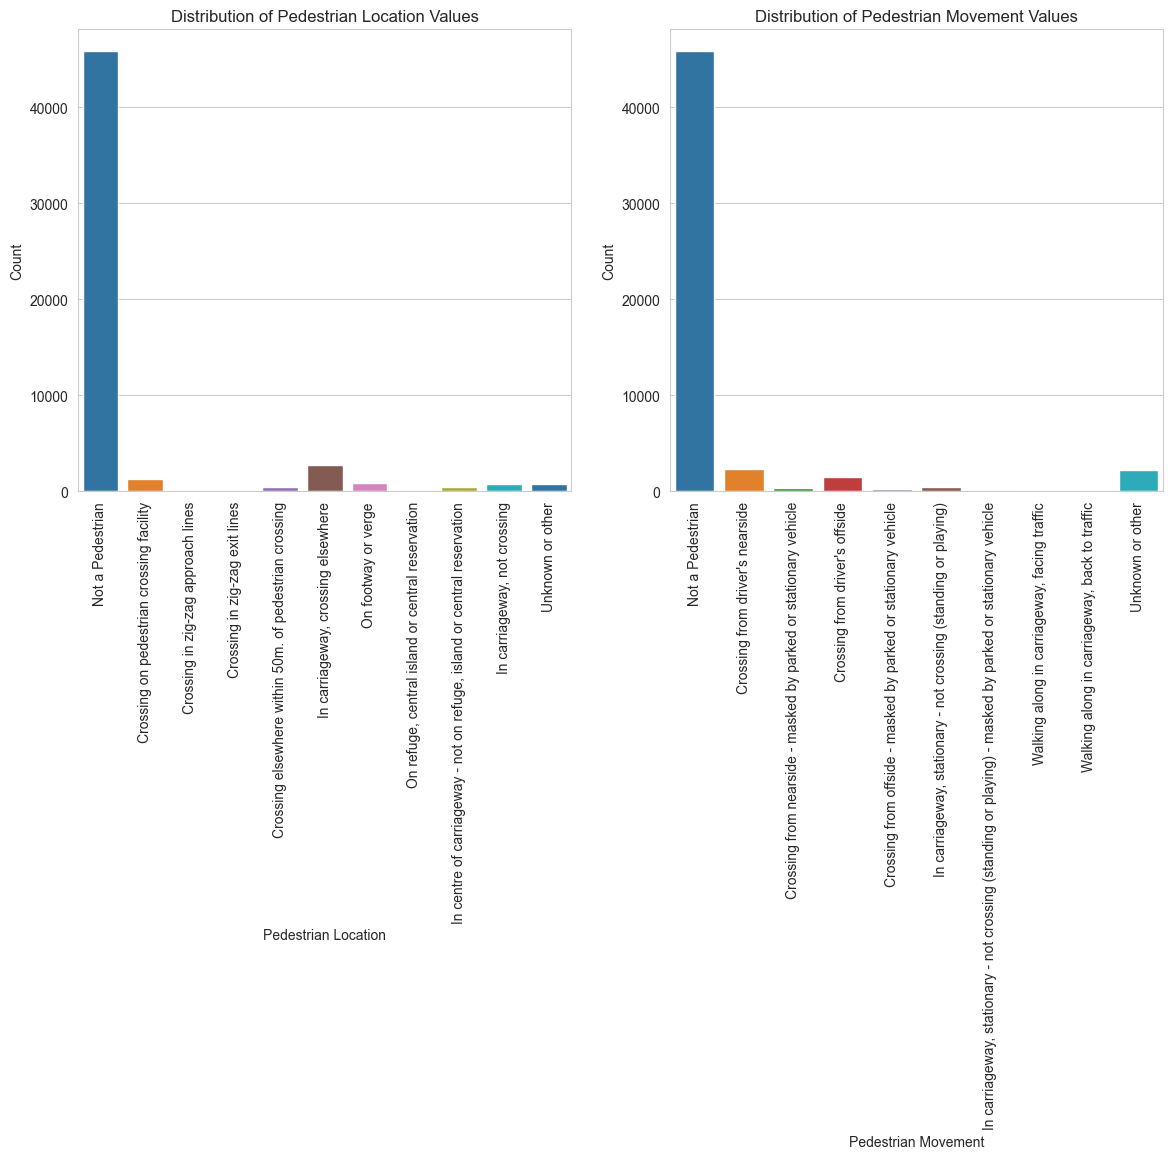

In [125]:
pedestrian_movement_labels = {
    0: 'Not a Pedestrian',
    1: "Crossing from driver's nearside",
    2: 'Crossing from nearside - masked by parked or stationary vehicle',
    3: "Crossing from driver's offside",
    4: 'Crossing from offside - masked by parked or stationary vehicle',
    5: 'In carriageway, stationary - not crossing (standing or playing)',
    6: 'In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle',
    7: 'Walking along in carriageway, facing traffic',
    8: 'Walking along in carriageway, back to traffic',
    9: 'Unknown or other'
}

pedestrian_location_labels = {
    0: 'Not a Pedestrian',
    1: 'Crossing on pedestrian crossing facility',
    2: 'Crossing in zig-zag approach lines',
    3: 'Crossing in zig-zag exit lines',
    4: 'Crossing elsewhere within 50m. of pedestrian crossing',
    5: 'In carriageway, crossing elsewhere',
    6: 'On footway or verge',
    7: 'On refuge, central island or central reservation',
    8: 'In centre of carriageway - not on refuge, island or central reservation',
    9: 'In carriageway, not crossing',
    10: 'Unknown or other'
}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.countplot(x='pedestrian_location', data=df, ax=axes[0], palette=current_palette)
axes[0].set_title('Distribution of Pedestrian Location Values')
axes[0].set_xlabel('Pedestrian Location')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(pedestrian_location_labels.values(), rotation=90)  # Add legend with rotated labels

sns.countplot(x='pedestrian_movement', data=df, ax=axes[1], palette=current_palette)
axes[1].set_title('Distribution of Pedestrian Movement Values')
axes[1].set_xlabel('Pedestrian Movement')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(pedestrian_movement_labels.values(), rotation=90)  # Add legend with rotated labels

plt.tight_layout()

plt.show()

Plot the relationship between pedestrian location, pedestrian movement and casualty severity

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3371661314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pedestrian_location', y='casualty_severity', data=df, ax=axes[0], palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3371661314.py:4: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='pedestrian_location', y='casualty_severity', data=df, ax=axes[0], palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3371661314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pedestrian_movement', y='casualty_severity', data=df, ax=axes[1], palette=cu

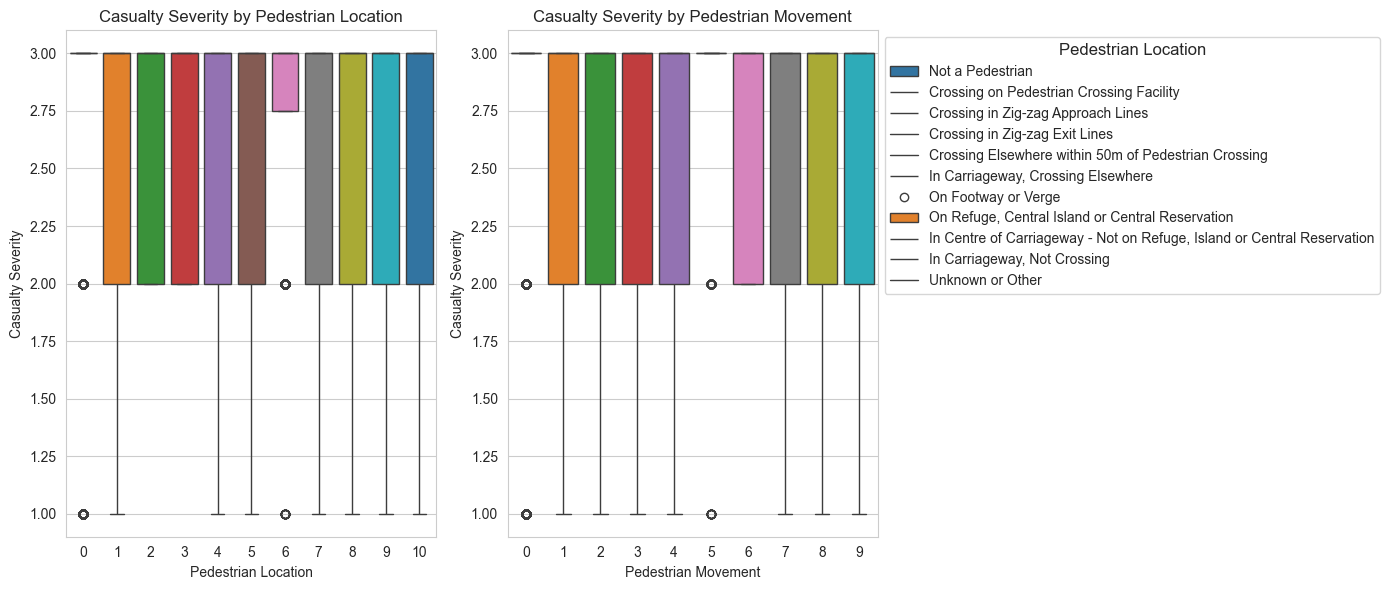

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the boxplot of casualty severity by pedestrian location
sns.boxplot(x='pedestrian_location', y='casualty_severity', data=df, ax=axes[0], palette=current_palette)
axes[0].set_title('Casualty Severity by Pedestrian Location')
axes[0].set_xlabel('Pedestrian Location')
axes[0].set_ylabel('Casualty Severity')

# Plot the boxplot of casualty severity by pedestrian movement
sns.boxplot(x='pedestrian_movement', y='casualty_severity', data=df, ax=axes[1], palette=current_palette)
axes[1].set_title('Casualty Severity by Pedestrian Movement')
axes[1].set_xlabel('Pedestrian Movement')
axes[1].set_ylabel('Casualty Severity')

# Add legend
legend_labels = ['Not a Pedestrian', 'Crossing on Pedestrian Crossing Facility', 'Crossing in Zig-zag Approach Lines',
                 'Crossing in Zig-zag Exit Lines', 'Crossing Elsewhere within 50m of Pedestrian Crossing',
                 'In Carriageway, Crossing Elsewhere', 'On Footway or Verge', 'On Refuge, Central Island or Central Reservation',
                 'In Centre of Carriageway - Not on Refuge, Island or Central Reservation', 'In Carriageway, Not Crossing',
                 'Unknown or Other']
legend = plt.legend(legend_labels, title='Pedestrian Location', loc='upper left', bbox_to_anchor=(1, 1))
plt.setp(legend.get_title(), fontsize=12)

plt.tight_layout()

plt.show()


Plot the distribution of accidents across age bands

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2711240176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_band_of_casualty', data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2711240176.py:2: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='age_band_of_casualty', data=df, palette=current_palette)


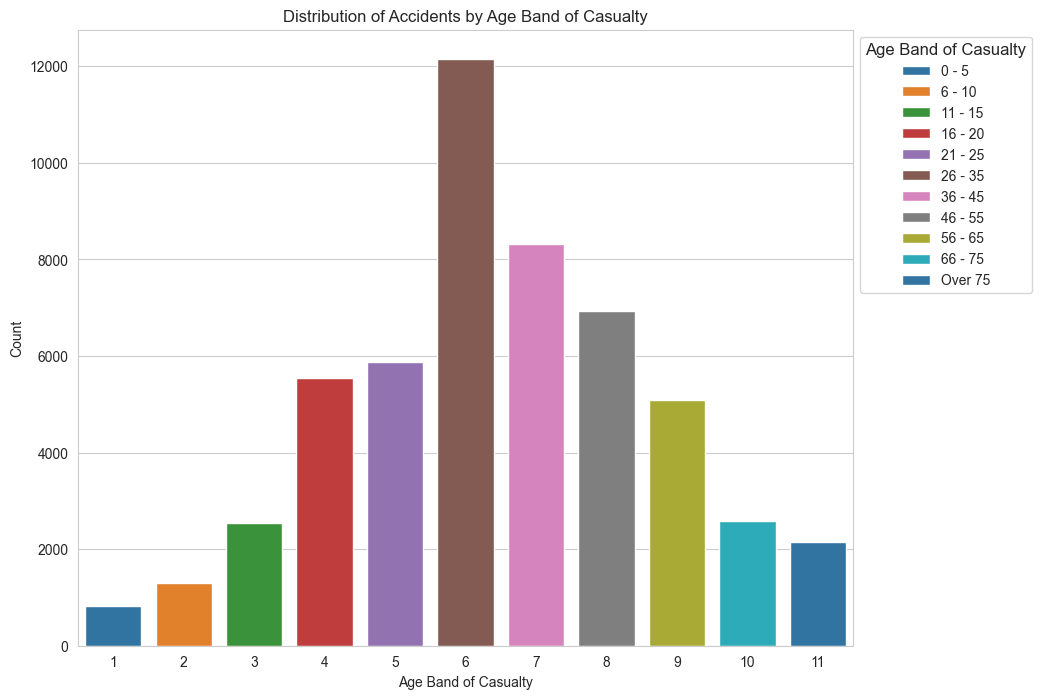

In [132]:
plt.figure(figsize=(10, 8))
sns.countplot(x='age_band_of_casualty', data=df, palette=current_palette)
plt.title('Distribution of Accidents by Age Band of Casualty')
plt.xlabel('Age Band of Casualty')
plt.ylabel('Count')

legend_labels = ['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', 'Over 75']
legend = plt.legend(legend_labels, title='Age Band of Casualty', loc='upper left', bbox_to_anchor=(1, 1))
plt.setp(legend.get_title(), fontsize=12)

plt.show()


Plot the distribution of vehicle reference values

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2889170134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vehicle_reference', data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2889170134.py:2: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='vehicle_reference', data=df, palette=current_palette)


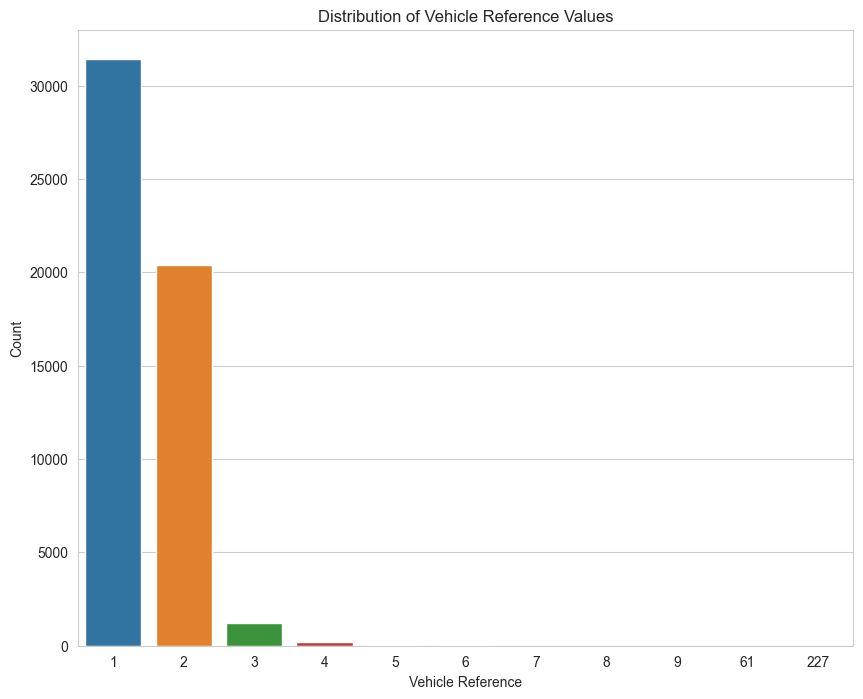

In [133]:
plt.figure(figsize=(10, 8))
sns.countplot(x='vehicle_reference', data=df, palette=current_palette)
plt.title('Distribution of Vehicle Reference Values')
plt.xlabel('Vehicle Reference')
plt.ylabel('Count')
plt.show()

Plot the distribution of Casualty_IMD_Decile values

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3786860539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='casualty_imd_decile', data=df, palette=current_palette)


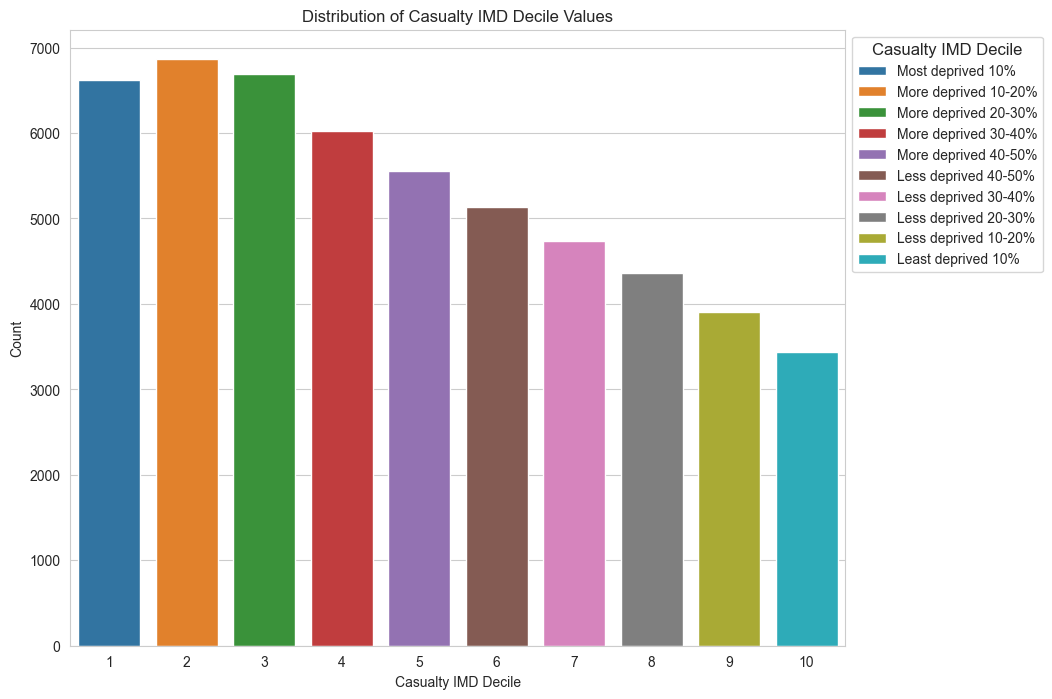

In [135]:
# Plot the distribution of Casualty IMD Decile values
plt.figure(figsize=(10, 8))
sns.countplot(x='casualty_imd_decile', data=df, palette=current_palette)
plt.title('Distribution of Casualty IMD Decile Values')
plt.xlabel('Casualty IMD Decile')
plt.ylabel('Count')

# Add legend
legend_labels = ['Most deprived 10%', 'More deprived 10-20%', 'More deprived 20-30%', 'More deprived 30-40%', 
                 'More deprived 40-50%', 'Less deprived 40-50%', 'Less deprived 30-40%', 'Less deprived 20-30%', 
                 'Less deprived 10-20%', 'Least deprived 10%']
legend = plt.legend(legend_labels, title='Casualty IMD Decile', loc='upper left', bbox_to_anchor=(1, 1))
plt.setp(legend.get_title(), fontsize=12)

plt.show()


Plot the distribution of Age_of_Casualty values

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\3596698140.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['age_of_casualty'], bins=20, kde=True, palette=current_palette)


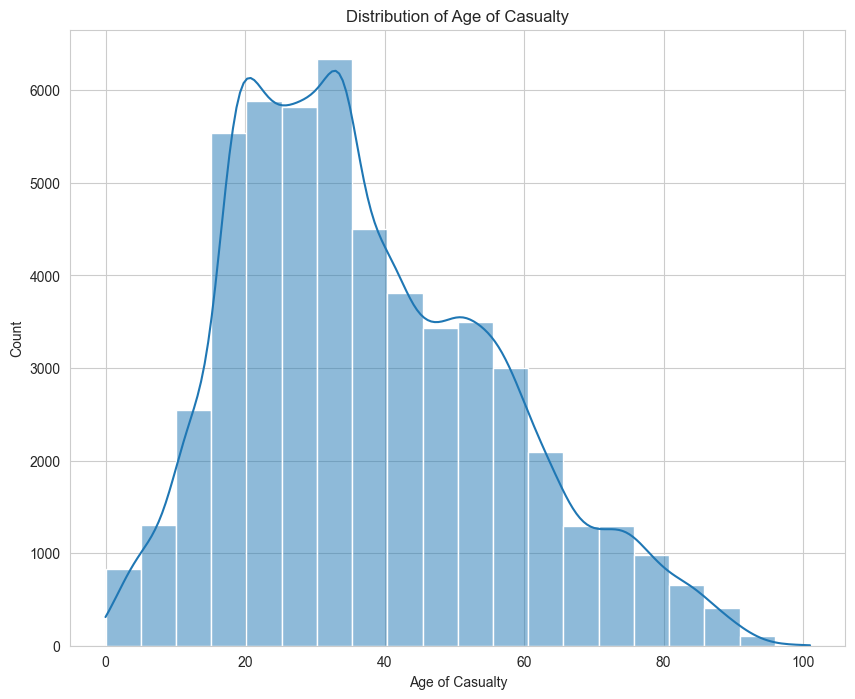

In [137]:
plt.figure(figsize=(10, 8))
sns.histplot(df['age_of_casualty'], bins=20, kde=True, palette=current_palette)
plt.title('Distribution of Age of Casualty')
plt.xlabel('Age of Casualty')
plt.ylabel('Count')
plt.show()

 bus or coach passenger categories

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2907032868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bus_or_coach_passenger', data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2907032868.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(x='bus_or_coach_passenger', data=df, palette=current_palette)


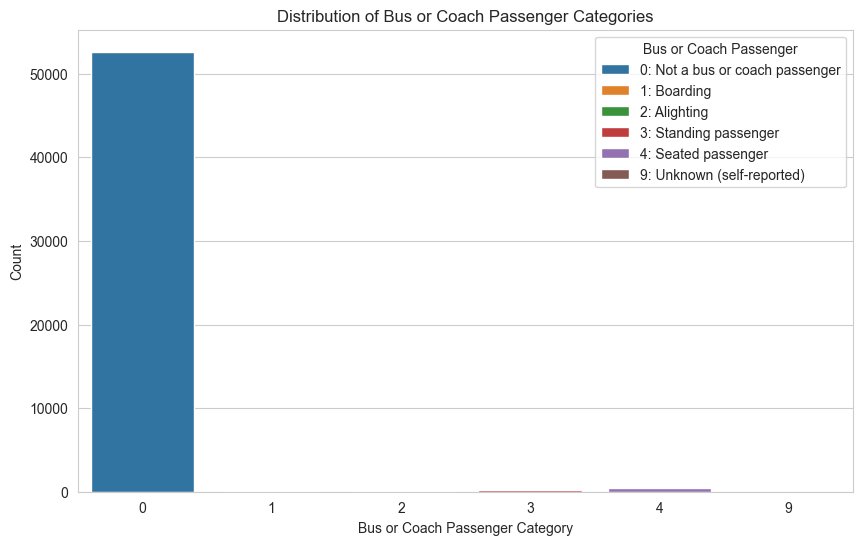

In [159]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bus_or_coach_passenger', data=df, palette=current_palette)

passenger_categories = {
    0: 'Not a bus or coach passenger',
    1: 'Boarding',
    2: 'Alighting',
    3: 'Standing passenger',
    4: 'Seated passenger',
    9: 'Unknown (self-reported)'
}

plt.legend(title='Bus or Coach Passenger', labels=[f'{key}: {value}' for key, value in passenger_categories.items()])

plt.title('Distribution of Bus or Coach Passenger Categories')
plt.xlabel('Bus or Coach Passenger Category')
plt.ylabel('Count')
plt.show()


# relationship comparison

Plot the relationship between casualty severity and the IMD decile

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\681812947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='casualty_severity', y='casualty_imd_decile', data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\681812947.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(x='casualty_severity', y='casualty_imd_decile', data=df, palette=current_palette)


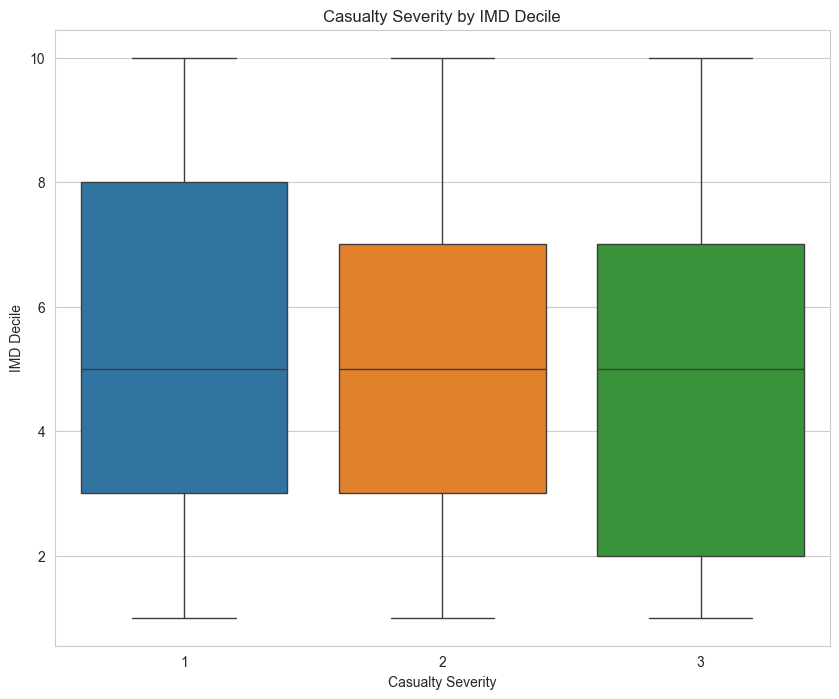

In [143]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='casualty_severity', y='casualty_imd_decile', data=df, palette=current_palette)
plt.title('Casualty Severity by IMD Decile')
plt.xlabel('Casualty Severity')
plt.ylabel('IMD Decile')
plt.show()

Plot the relationship between casualty severity and age band

C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2368924261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df, palette=current_palette)
C:\Users\ROG\AppData\Local\Temp\ipykernel_12356\2368924261.py:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df, palette=current_palette)


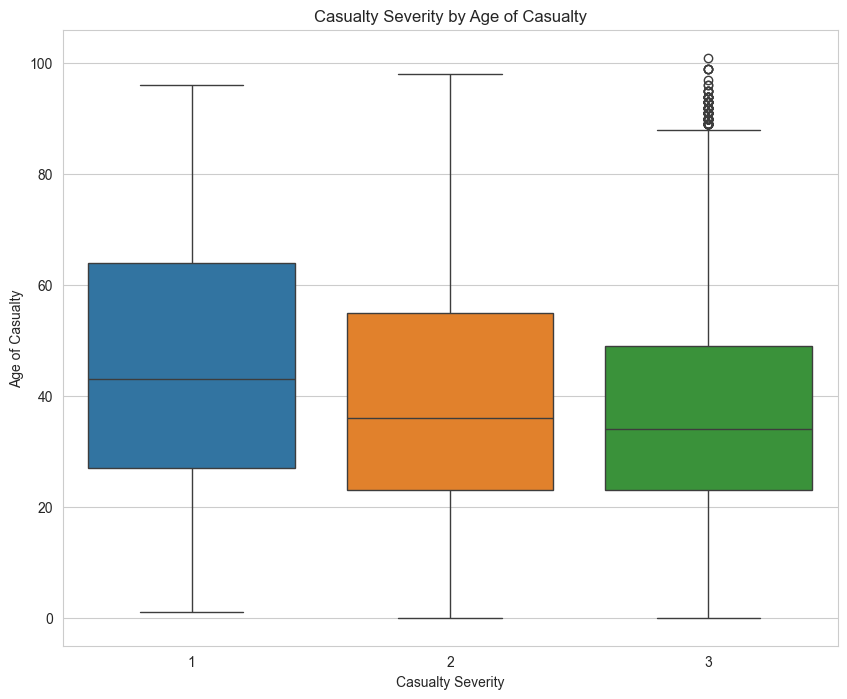

In [139]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='casualty_severity', y='age_of_casualty', data=df, palette=current_palette)
plt.title('Casualty Severity by Age of Casualty')
plt.xlabel('Casualty Severity')
plt.ylabel('Age of Casualty')
plt.show()

In [157]:
print(df['bus_or_coach_passenger'].value_counts())

bus_or_coach_passenger
0    52628
4      396
3      221
2       43
1       27
9        6
Name: count, dtype: int64


In [ ]:
df.to_csv('cleaned_data.csv')